In [1]:
import numpy as np
import json
from scipy import stats
import matplotlib.pyplot as plt

DATA_FILE = '/Users/brendan/Documents/projects/risky_sir/go/data/full_results_old.json'

colors = ["blue", "magenta", "red"]
linestyles = ['-', '--', ':']

with open(DATA_FILE) as file:
    all_data = json.load(file)

In [4]:
def compute_r(R0, N=1000):
    upper_r = 1
    lower_r = 0
    for T in range(1000):
        r = (upper_r + lower_r)/2
        r_ = (1 - np.exp(-R0 * r))
        if r_ < r:
            upper_r = r
        else:
            lower_r = r
    return r*N

compute_r(8)

999.6636334491886

In [47]:
all_data['Heterogeneous'][0]['TrialResults'][0]['Mu']

2

Text(0, 0.5, 'Final size (total Recovered)')

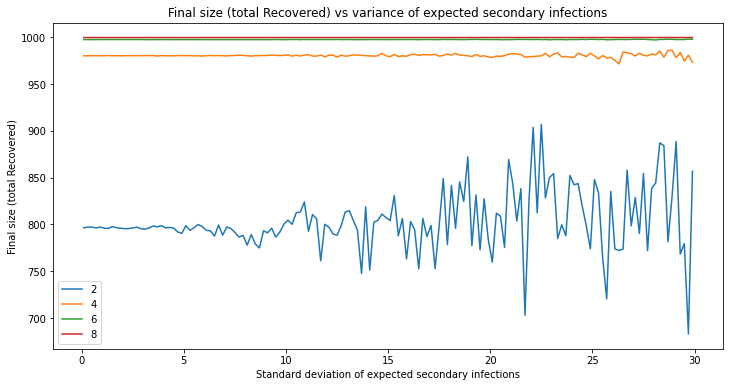

In [3]:
data = all_data['Heterogeneous']
plt.figure(figsize=(12, 6))
for series in all_data['Heterogeneous']:
    mu = series['TrialResults'][0]['Mu']
    stds = []
    weighted_means = []
    for tr in series['TrialResults']:
        count = 0
        total = 0
        for r in tr['FinalRs']:
            if r >= 300:
                count += 1
                total += r
        weighted_means.append((total/count if count > 0 else None))
        stds.append(tr['Std'])
    plt.plot(stds, weighted_means, label=mu)
plt.legend()
plt.title('Final size (total Recovered) vs variance of expected secondary infections')
plt.xlabel('Standard deviation of expected secondary infections')
plt.ylabel('Final size (total Recovered)')

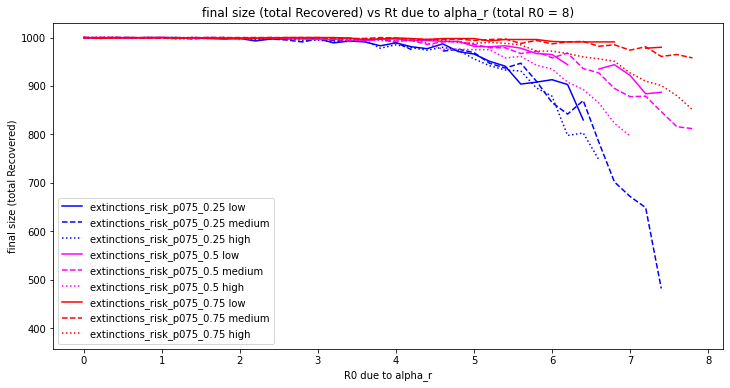

In [4]:
plt.figure(figsize=(12, 6))
plt.ylabel('final size (total Recovered)')
plt.xlabel('R0 due to alpha_r')
plt.title('final size (total Recovered) vs Rt due to alpha_r (total R0 = 8)')
for i, p in enumerate(['25', '5', '75']):
    for j, var in enumerate(['low', 'medium', 'high']):
        data = all_data['RiskStructured'][(2-i)*3 + (2-j)]
        alphaCs = []
        weighted_means = []
        for tr in data['TrialResults']:
            alphaCs.append(8 - tr['AlphaC'])
            for r in tr['FinalRs']:
                count = 0
                total = 0
                if r >= 300:
                    total += r
                    count += 1
                weighted_mean = total / count if count > 0 else None
            weighted_means.append(weighted_mean)
        plt.plot(alphaCs, weighted_means, label=data['Description'], color=colors[i], linestyle=linestyles[j])
plt.legend()

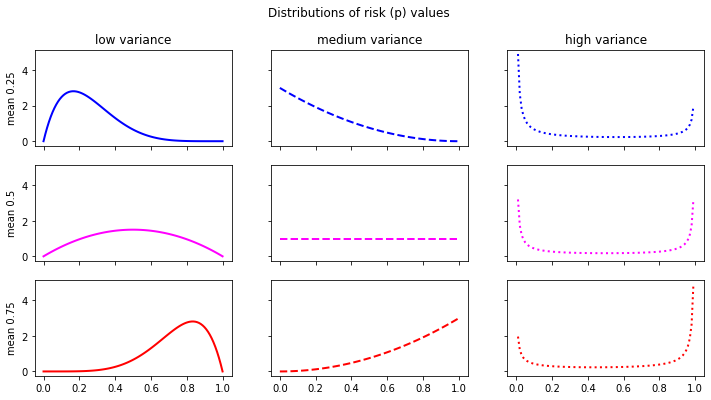

In [24]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 6))
fig.suptitle("Distributions of risk (p) values")
bases = [(1, 3, "mean 0.25"), (1, 1, "mean 0.5"),  (3, 1, "mean 0.75")]
factors = [(2, "low variance"), (1, "medium variance"), (0.1, "high variance")]
linestyles = ['-', '--', ':']
for i, (a, b, desc_i) in enumerate(bases):
    for j, (f, desc_j) in enumerate(factors):
        

        x = np.linspace(0, 1, 100)

        g = stats.beta(f*a, f*b)
        axs[i][j].plot(x, g.pdf(x), lw=2, color=colors[i], linestyle=linestyles[j])
        if (i == 0):
            axs[i][j].set_title(desc_j)
        if (j == 0):
            axs[i][j].set_ylabel(desc_i)
        #plt.legend()

#g.std()